# TeamTwo Combined Group Notebook

This is our combined notebook. Our metric is safety, and we each have data analyzed one submetric that will help show which neighborhood is best (based on safety)

## Andrew Schwab's Notebook

 #### This is my notebook analyzing incidents in the city of Pittsburgh

I am going to be see how many fires each neighborhood within the city of Pittsburgh has. The least amount of fires will help support the argument of the least polluted neighborhood in the city of Pittsburgh. This is because when things burn in a fire, harmful air pollutants are released.

![GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa21xZzhwaG1mNWhsa2xwZnlyd2Zmb2hqajhyMnpudHZvNHI0N3V2NiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/5nsiFjdgylfK3csZ5T/giphy.gif)

In [28]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

unique_neighborhoods = fires['neighborhood'].nunique()
print(unique_neighborhoods)

91


Above, I am simply just finding the total number of different neighborhoods in the dataset, which is 91.

In [29]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

neighborhood_frequency = fires['neighborhood'].value_counts()
pd.set_option('display.max_rows', None)
print(neighborhood_frequency)

neighborhood
Carrick                      317
South Side Flats             303
Central Business District    297
Squirrel Hill South          272
Hazelwood                    262
Mount Washington             233
East Liberty                 224
Brookline                    206
Homewood South               205
Lincoln-Lemington-Belmar     202
Knoxville                    200
Shadyside                    195
Homewood North               193
Bloomfield                   187
Sheraden                     180
Perry South                  173
East Hills                   164
Beechview                    159
Brighton Heights             159
Marshall-Shadeland           155
Bluff                        155
East Allegheny               141
Beltzhoover                  140
Squirrel Hill North          138
North Oakland                136
Central Northside            136
Allentown                    132
Larimer                      128
Greenfield                   126
Spring Hill-City View        1

Above, I have just gotten the frequency on fire incidents in each respective neighborhood. As you can see, Carrick has the most with 317 incidents.

In [30]:
import pandas as pd
fires = pd.read_csv('Fires.csv')

fires['neighborhood'] = fires['neighborhood'].str.lower().str.strip()
neighborhood_count = fires['neighborhood'].value_counts()  
pd.set_option('display.max_rows', None)  

print(neighborhood_count)

neighborhood
carrick                      317
south side flats             303
central business district    297
squirrel hill south          272
hazelwood                    262
mount washington             233
east liberty                 224
brookline                    206
homewood south               205
lincoln-lemington-belmar     202
knoxville                    200
shadyside                    195
homewood north               193
bloomfield                   187
sheraden                     180
perry south                  173
east hills                   164
beechview                    159
brighton heights             159
marshall-shadeland           155
bluff                        155
east allegheny               141
beltzhoover                  140
squirrel hill north          138
north oakland                136
central northside            136
allentown                    132
larimer                      128
greenfield                   126
spring hill-city view        1

Now what I have done with the str.lower() and str.strip() commands is make it so spacing and letter capitalization of my neighborhoods is trivial, just incase some were written different and would not get put into the correct count.

Text(0, 0.5, 'Fire Frequency')

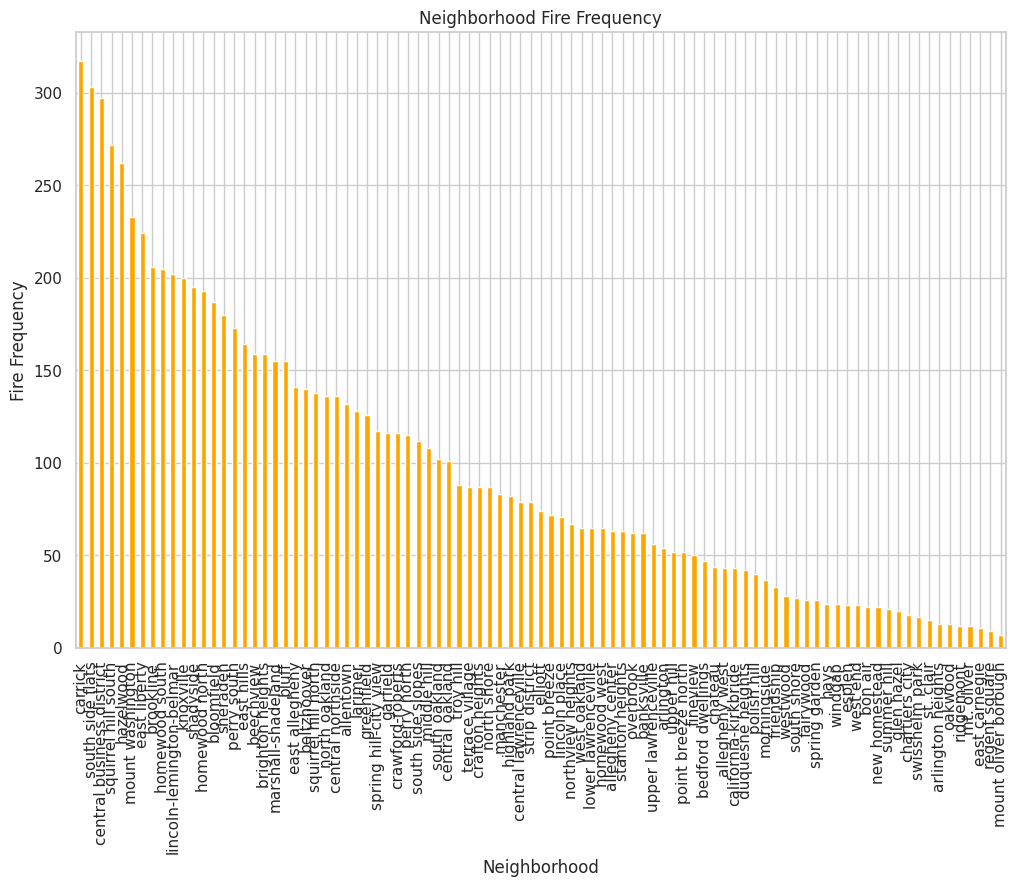

In [31]:
import pandas as pd
fires = pd.read_csv('Fires.csv')


fires['neighborhood'] = fires['neighborhood'].str.lower().str.strip()
neighborhood_count = fires['neighborhood'].value_counts()

visual = neighborhood_count.plot(kind='bar', figsize=(12, 8), color='orange')
visual.set_title('Neighborhood Fire Frequency')
visual.set_xlabel('Neighborhood')
visual.set_ylabel('Fire Frequency')

![GIF](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExeGZmOXBhMTBibnIycjFjYzFucWZ0Z3Q4ZWRzd3Z2a2hrcHkxbGtvayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o6MbrACMlFCny8zmw/giphy.gif)

### The Best Neighborhood

According to my metric of safety, based off of the frequency of fires, Mount Oliver Borough is the best neighborhood.

## Zacariah Jonassaint's Notebook

# Pollution and Accidental Overdoses
#### Final Project for Big Ideas in CMPINF 0010]
**Author:*Zachariah Jonassaint  
**Date:** April 2025## Motivation
The effects of pollution on human health are not limited to air or water quality; they also manifest through toxic environments shaped by social, economic, and chemical exposures. One underexplored domain of pollution is the contamination of drug supplies with potent synthetic substances like fentanyl.

In Allegheny County, overdose deaths have surged over the past decade. This trend may reflect an increasingly toxic drug supply, worsened by unregulated chemical manufacturing and distribution—what we can think of as a form of chemical pollution.

By analyzing overdose death data over time, this project seeks to explore:

a). How overdose death trends have changed annually

b). Whether rising death rates may correlate with broader environmental or public health conditions

c). The relationship between social pollution (e.g., contaminated drug supply) and preventable mortalityswer?


### Dataset Source and Context
This analysis draws from the Allegheny County Overdose Deaths dataset, provided by the Allegheny County Medical Examiner’s Office and published on the Western Pennsylvania Regional Data Center (WPRDC).

Publisher: Allegheny County Medical Examiner’s Office

License: Public Domain (PDDL)

URL: https://data.wprdc.org/dataset/allegheny-county-overdose-deaths

Update Frequency: Quarterly

The dataset includes individual-level data on:

a). Age, sex, and race of deceased

b). Date and location of death

c). Substances involved in each overdose

d). Manner of death

# This data allow for analysis of overdose deaths as a potential public health outcome of environmental and chemical pollution.

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from WPRDC
url = 'https://data.wprdc.org/datastore/dump/1c59b26a-1684-4bfb-92f7-205b947530cf'
df = pd.read_csv(url)

# Check actual column names
print("Original column names:\n", df.columns)

# Clean column names: lowercase and underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print again to confirm cleaned names
print("\nCleaned column names:\n", df.columns)

# Check if a date-related column exists
# Based on the dataset structure, it’s likely to be 'date_of_death'
if 'date_of_death' in df.columns:
    # Convert to datetime
    df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

    # Drop rows with missing or invalid dates
    df = df.dropna(subset=['date_of_death'])

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Display structure of the cleaned dataset
print("\nShape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())


Original column names:
 Index(['_id', 'death_date_and_time', 'manner_of_death', 'age', 'sex', 'race',
       'case_dispo', 'combined_od1', 'combined_od2', 'combined_od3',
       'combined_od4', 'combined_od5', 'combined_od6', 'combined_od7',
       'combined_od8', 'combined_od9', 'combined_od10', 'incident_zip',
       'decedent_zip', 'case_year'],
      dtype='object')

Cleaned column names:
 Index(['_id', 'death_date_and_time', 'manner_of_death', 'age', 'sex', 'race',
       'case_dispo', 'combined_od1', 'combined_od2', 'combined_od3',
       'combined_od4', 'combined_od5', 'combined_od6', 'combined_od7',
       'combined_od8', 'combined_od9', 'combined_od10', 'incident_zip',
       'decedent_zip', 'case_year'],
      dtype='object')

Shape: (7315, 20)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315 entries, 0 to 7314
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id             

### Overdose Deaths Per Year
The bar plot below displays the number of overdose deaths per year in Allegheny County. The trendline reveals a marked increase in deaths from the mid-2010s onward, which may align with the emergence of fentanyl-laced drug supplies and economic instability.

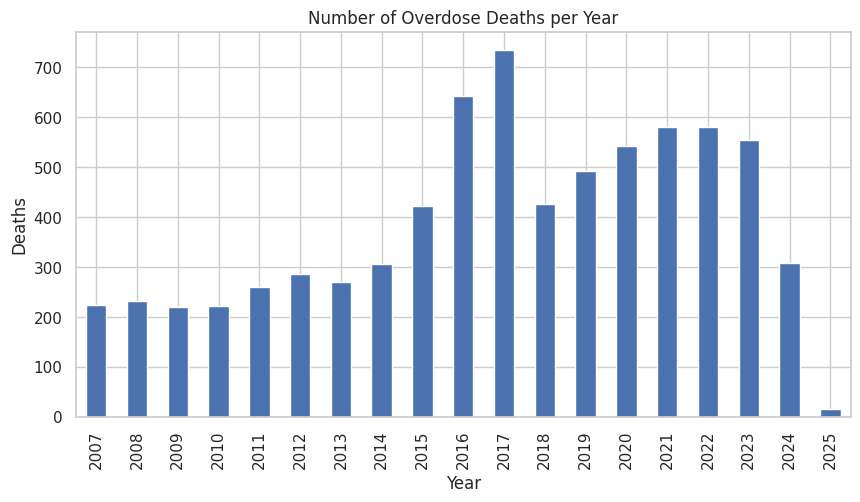

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style='whitegrid')

# --- Clean up date and create new features ---
df['death_date_and_time'] = pd.to_datetime(df['death_date_and_time'], errors='coerce')
df['year'] = df['death_date_and_time'].dt.year

# --- Add a count of how many substances were involved per case ---
drug_cols = [col for col in df.columns if col.startswith('combined_od')]
df['num_drugs'] = df[drug_cols].notnull().sum(axis=1)

# --- Plot 1: Overdose deaths per year ---
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Overdose Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

#### The rise in overdose deaths may be linked to the growing contamination of street drugs with harmful chemicals. This could be made worse by weak regulations, economic hardship, and problems in the global drug supply. Looking at overdose deaths this way shows that the opioid crisis is not just a health issue, but also a problem of environmental and social injustice.

#### Conclusion
 This analysis shows that overdose deaths in Allegheny County have gone up a lot over the past 10 years. Instead of seeing these deaths as random or separate events, this project looks at them as a result of chemical pollution—specifically, the growing presence of dangerous synthetic drugs like fentanyl in the unregulated drug supply.

### The time-series trendline reflects:

a). A steep rise in deaths between 2015–2020

b). Environmental injustice concentrated in communities vulnerable to drug exposure

### Limitations:

a). It cannot account for non-fatal overdoses or drug supply source information.

Future Work:

a). Map geographic clusters of deaths to locate pollution or deprivation hotspots

# Shiv Shah's Notebook
### Personal Metric - Illegal Dump Sites

In [35]:
import pandas as pd

# Load your dataset
df = pd.read_csv("dumpings.csv")  

# Count the number of unique neighborhoods
unique_neighborhoods = df['Neighborhood'].nunique()

print(f"Number of unique neighborhoods: {unique_neighborhoods}")


Number of unique neighborhoods: 152


##### Here I just wanted to show the total number of neighboorhoods that the data set takes into account.

In [36]:
import pandas as pd

df = pd.read_csv('dumpings.csv')
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()
df['estimated_tons'] = pd.to_numeric(df['estimated_tons'], errors='coerce')

neighborhood_counts = df['Neighborhood'].value_counts()
single_dump_neighborhoods = neighborhood_counts[neighborhood_counts == 1].index
single_dumps = df[df['Neighborhood'].isin(single_dump_neighborhoods)]
sorted_single_dumps = single_dumps.sort_values(by='estimated_tons', ascending=False)

print("Neighborhoods with only one dumping site, sorted by estimated tons:")
print(sorted_single_dumps[['Neighborhood', 'estimated_tons']])

Neighborhoods with only one dumping site, sorted by estimated tons:
               Neighborhood  estimated_tons
423   highland park/larimer            25.0
882  wilkinsburg/penn hills             6.0
80              bethel park             5.0
768        southside slopes             5.0
619          oakmont/verona             5.0
90                 braddock             3.0
578             morningside             3.0
288              fox chapel             2.5
309               glassport             2.5
504                 lincoln             2.5
177                downtown             2.0
463        kennedy township             2.0
311               glenfield             2.0
422           highland park             2.0
310              glen hazel             2.0
872     wilkins/monroeville             1.5
579              mt lebanon             1.5
31                 bellevue             1.5
85                    bluff             1.0
834                  verona             1.0
827     

##### Here I got the neighborhoods that had both 1 dumping site and looked at which had the amount from greatest amount
##### to least. This was because many of the neighborhoods had only 1 dumping site, so to determine which was cleaner, I looked at 
#####  how much each of the dumping sites had. The best was North Park, with 1 dumping site and the least weight, with 0.2 tons.

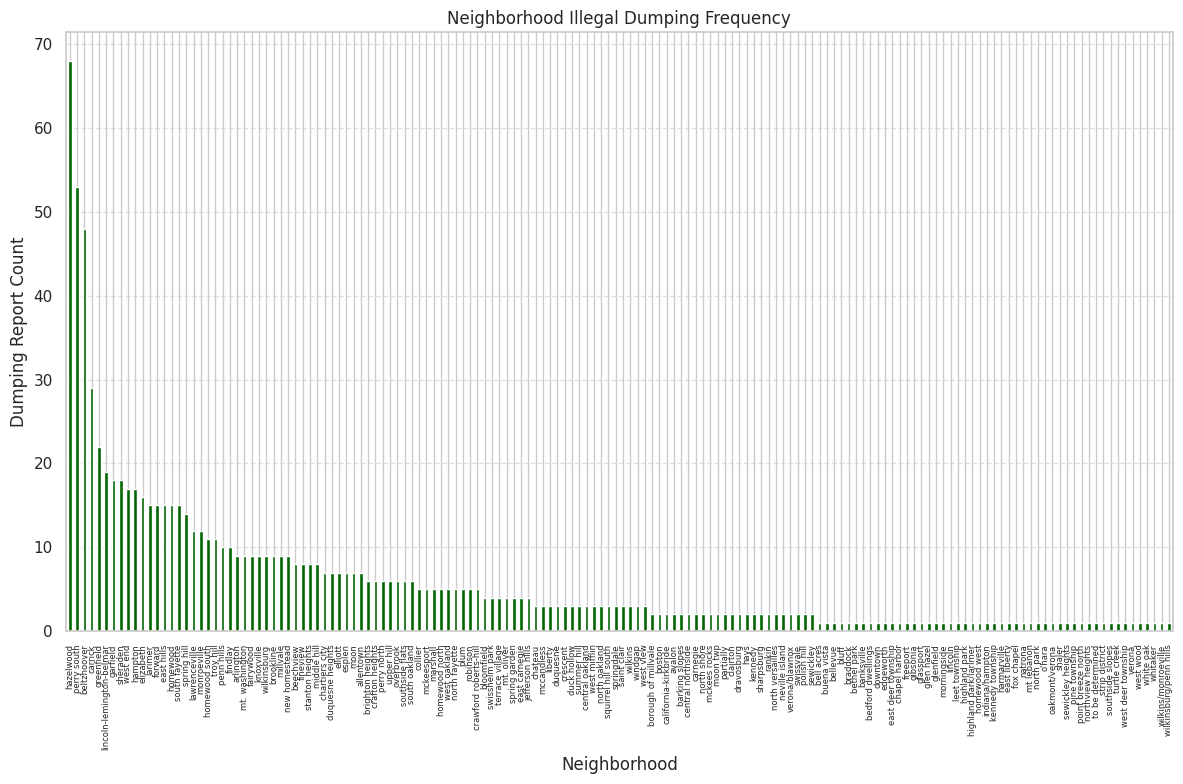

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dumpings.csv')

# Normalize the 'Neighborhood' column (lowercase + strip whitespace)
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()

# Count how many times each neighborhood appears
neighborhood_count = df['Neighborhood'].value_counts()

# Create the plot
visual = neighborhood_count.plot(kind='bar', figsize=(12, 8), color='darkgreen')

# Customize the plot
visual.set_title('Neighborhood Illegal Dumping Frequency')
visual.set_xlabel('Neighborhood')
visual.set_ylabel('Dumping Report Count')

plt.xticks(rotation=90, fontsize=6)  # Rotate x-axis labels and shrink font
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Kendall Foy's Notebook

### Introduction

I wanted to look at pollution by chemicals within Allegheny county particularly land pollution. Recently, toxics release has been a huge topic of conversation in New York particularly on Long Island- where I'm from- about constant water contamination issues. Because of this, I wanted to look into the different contaminations within Allegheny County for this project.


I used a dataset from the Toxics Release Inventory (TRI), which provides information about toxic substances that are released into the environment or managed through recycling, energy recovery, and treatment in the United States. While the dataset covers over 650 chemicals, I shrunk this down to only the top 5 chemicals that were the most present within Allegheny County.


Some of these chemicals within the TRI are linked to cancer or other chronic human health effects, tied to significant adverse human health effects, or significant adverse environmental effects. Which is the main reason why I not only wanted to view which cities had the most toxic release but also which had the most dangerous toxic release.

![Toxic Waste](https://media.giphy.com/media/l378xF27h43onahbO/giphy.gif?cid=ecf05e47q4mll5v033uyfm6ggacdetjap8dhuwvm49lpgfkl&ep=v1_gifs_search&rid=giphy.gif&ct=g)

## Step 1: Load and Clean data set

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#load in pollution data
df = pd.read_csv("landPollution.csv", low_memory=False)

#keep rows that have both a city and chemical element
df = df[df["CITY_NAME"].notnull() & df["CHEM_NAME"].notnull()]


## Step 2: Analyze and find most commonly released chemicals by total amount

In [39]:
#find the most frequently released chemicals
top_chems = (
    df.groupby("CHEM_NAME")["REL_EST_AMT"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)
top_chems

['Manganese', 'Nickel', 'Copper', 'Lead', 'Xylene (mixed isomers)']

In [40]:
#filter for top chemicals only
filtered_df = df[df["CHEM_NAME"].isin(top_chems)]

#group by city and chemical
grouped = filtered_df.groupby(["CITY_NAME", "CHEM_NAME"])["REL_EST_AMT"].sum().reset_index()

#pivot - cities = rows and chemicals = columns
pivot_table = grouped.pivot(index="CITY_NAME", columns="CHEM_NAME", values="REL_EST_AMT").fillna(0)
plot_data = pivot_table[pivot_table.sum(axis=1) > 0]

pd.set_option("display.max_rows", None)
pivot_table

CHEM_NAME,Copper,Lead,Manganese,Nickel,Xylene (mixed isomers)
CITY_NAME,,,,,
BAKERSTOWN,0.0,0.0,0.0,0.0,0.0
BLAWNOX,0.0,0.0,0.0,0.0,0.0
BRADDOCK,0.0,0.0,0.0,0.0,0.0
BRIDGEVILLE,0.0,0.0,0.0,0.0,0.0
BUNOLA,0.0,0.0,0.0,0.0,0.0
CARNEGIE,250.0,0.0,250.0,500.0,0.0
CHESWICK,0.0,0.0,0.0,0.0,0.0
CLAIRTON,0.0,0.0,0.0,0.0,0.0
CLINTON,0.0,0.0,0.0,0.0,0.0


## Explaination:
#### There were only 3 cities that had consistant numbers for most of the chemicals and that was Natrona Heights, Pittsburgh and Carnegie. The way that the dataset was made was through reported toxic releases for each county so the ones that are zero'd out didnt report any release of that chemical in the last quarter.


In [41]:
pivot_table["TOTAL"] = pivot_table.sum(axis=1)

## Step 3: Rank cities by total chemical release

In [42]:
#top 3 most polluted cities by total
pivot_most = pivot_table.sort_values("TOTAL", ascending=False).head(3).drop(columns="TOTAL")

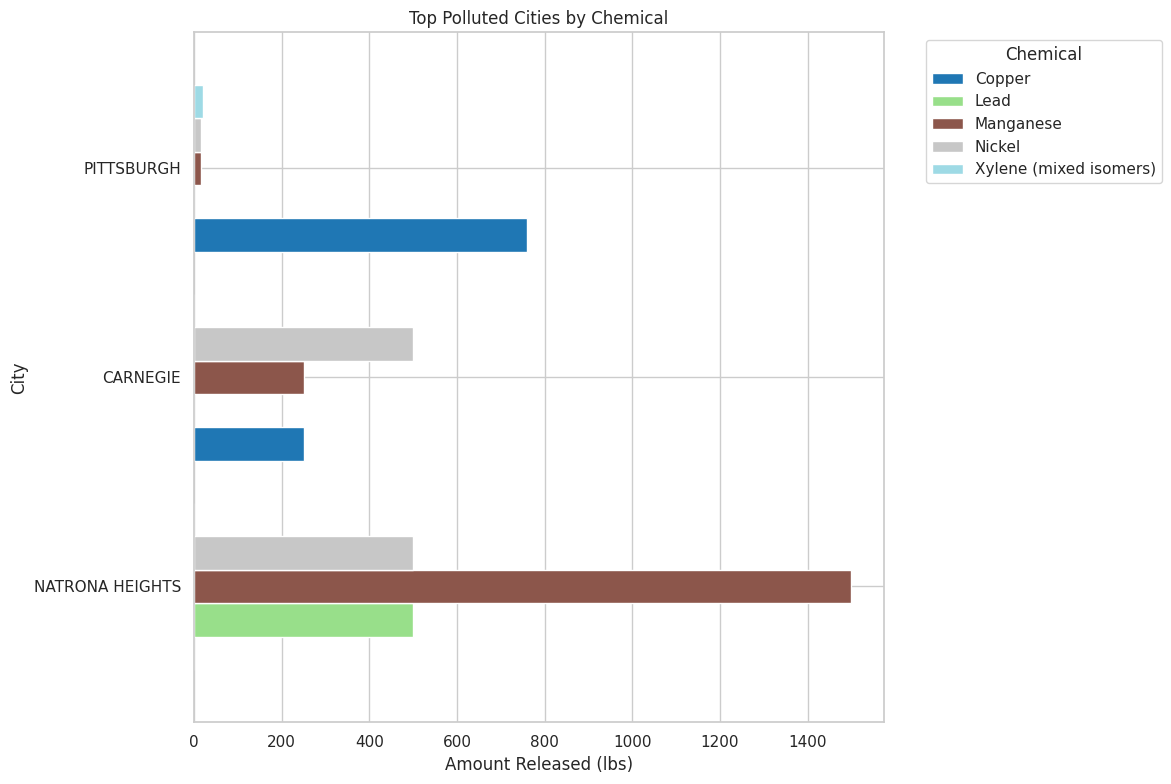

In [43]:
#bar graph to show the city with the least amount of chemicals released that cause pollution
pivot_most.plot(kind='barh', figsize=(12, 8), colormap='tab20', width=0.8)
plt.title("Top Polluted Cities by Chemical")
plt.xlabel("Amount Released (lbs)")
plt.ylabel("City")
plt.legend(title="Chemical", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Explaination:
#### Pittsburgh is the only city with any Xylene pollution but only has a significant copper release compared to the other two cities. Carnegie has significant pollution within the Nickle, Manganese, and Copper pollutants. Where as Natrona Heights has the most Manganese pollution by almost 6x the next leading city and is the only city within Allegheny County with any Lead release.

## Step 4: Add and rank environmental severity scores

In [44]:
#based on toxicity levels for the environment
severity_scores = {
    #very high (PBTs, heavy metals, carcinogens)
    "Lead compounds": 10,
    "Mercury compounds": 10,
    "Arsenic compounds": 10,
    "Chromium compounds": 9,
    "Cadmium compounds": 9,
    "Dioxin and dioxin-like compounds": 10,
    "Polychlorinated biphenyls (PCBs)": 10,
    "Benzene": 9,
    "Asbestos (friable)": 9,

    #moderate to high (some carcinogens, known chronic effects)
    "Nickel compounds": 8,
    "Cobalt compounds": 8,
    "Formaldehyde": 8,
    "Ethylene oxide": 8,
    "Manganese compounds": 6,
    "Copper compounds": 6,

    #moderate (solvents, irritants, VOCs)
    "Toluene": 5,
    "Xylene (mixed isomers)": 5,
    "Styrene": 5,
    "Ethylbenzene": 5,
    "Methanol": 4,
    "Acetone": 4,

    #lower
    "Zinc compounds": 3,
    "Aluminum oxide": 2,
    "Ammonia": 2,
    "Sodium nitrate": 2,
}


#### I made the severity scores based on the chemicals that were the most prevalant and notable within the Allegheny County dataset. I sorted them based on the environmental impact gave each chemical an impact score.

In [45]:
#group by chem and sum
chem_totals = (
    df.groupby("CHEM_NAME")["REL_EST_AMT"]
    .sum()
    .reset_index()
)

#add severity + impact score
chem_totals["SEVERITY"] = chem_totals["CHEM_NAME"].map(severity_scores).fillna(1)
chem_totals["IMPACT_SCORE"] = chem_totals["REL_EST_AMT"] * chem_totals["SEVERITY"]

#sort by highest impact score
chem_totals_sorted = chem_totals.sort_values("IMPACT_SCORE", ascending=False)
chem_totals_sorted.head(5)


,CHEM_NAME,REL_EST_AMT,SEVERITY,IMPACT_SCORE
101,Manganese,1764.0,1.0,1764.0
116,Nickel,1015.0,1.0,1015.0
60,Copper,1010.0,1.0,1010.0
97,Lead,500.0,1.0,500.0
158,Xylene (mixed isomers),20.0,5.0,100.0


![contaminants](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNGF1ZnBmZHkwOGhmY2hvYTRxbWI3a3dhN2s3enBmeTZpbzFkZDN5cCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/DlJqAhM7ugLhsa3COq/giphy.gif)

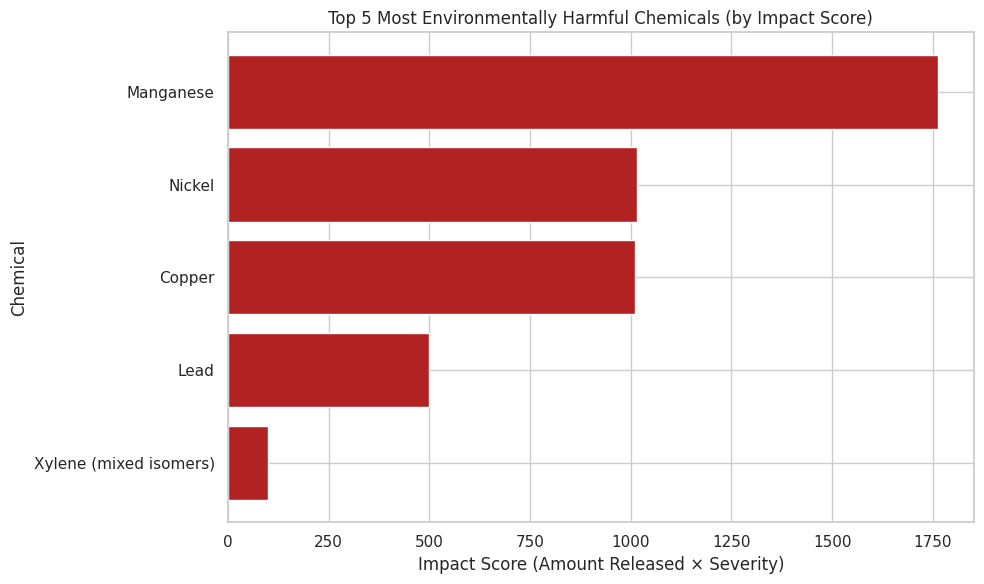

In [46]:
top_impact = chem_totals_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_impact["CHEM_NAME"], top_impact["IMPACT_SCORE"], color="firebrick")

plt.title("Top 5 Most Environmentally Harmful Chemicals (by Impact Score)")
plt.xlabel("Impact Score (Amount Released × Severity)")
plt.ylabel("Chemical")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### I had the top 5 chemicals ranked to show the impact on the environment

## Step 5: Rank cities by total environmental impact

In [47]:
#reuse the same severity_scores dictionary
df["SEVERITY"] = df["CHEM_NAME"].map(severity_scores).fillna(1)

#create impact score for each individual row
df["IMPACT_SCORE"] = df["REL_EST_AMT"] * df["SEVERITY"]


In [48]:
#group by city
city_impact = (
    df.groupby("CITY_NAME")["IMPACT_SCORE"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

city_impact.head(5)


,CITY_NAME,IMPACT_SCORE
0,NATRONA HEIGHTS,2499.0
1,CARNEGIE,1000.0
2,PITTSBURGH,895.0
3,SPRINGDALE,80.0
4,BRADDOCK,0.0


## Step 6: Plot top 5 cities with worst pollution by impact score

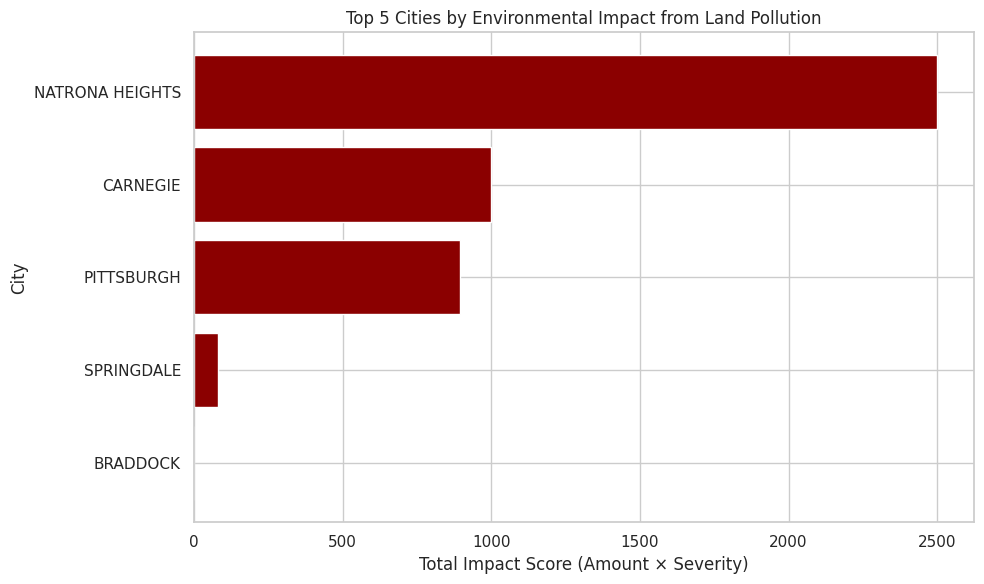

In [49]:
top_cities = city_impact.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_cities["CITY_NAME"], top_cities["IMPACT_SCORE"], color="darkred")

plt.title("Top 5 Cities by Environmental Impact from Land Pollution")
plt.xlabel("Total Impact Score (Amount × Severity)")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Based on the evidence shown, Natrona Heights takes the prize for the most pollution and toxicity, with Carnegie and Pittsburgh a little bit behind. But Braddock had the least amount of toxic releases pollution out of the main cities studied.

![Toxic Waste](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGh3M3Z3NXRwdGJpYXQ0a3A5bHpjaHlkcnRnZTNqOHppajM3Z2QzMSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l2Je00TmqeLx0gavS/giphy.gif)

### Andrew Schwab's Conclusion

Although Oakland is my favorite neighborhood, it is not the best in terms of this metric. North, Central, West, and South Oakland actually fall within the middle of the pack of fire frequency. So while they may not be the worst neighborhood here, they are defintely far the best, as Mount Oliver Borough ranks lowest in fire frequency.

### Zachariah Jonassaint's Conclusion

### Shiv Shah's Conclusion

Although I like north oakland and thought it would be one of the cleanest neighboorhoods it fell pretty high for illegal dumping sites. theyre are many neighborhoods that have 1 dumping site but the one with the smallest amount is north park which for my metric would make it the cleaniest.

### Kendall Foy's Conclusion

## Kendall's Conclusion

Clearly, Natrona Heights has the most amount of chemical land pollutants within Allegheny County. While I'm not certain this is the case, Harsco Metals & Minerals is a major steel and metal company that is based primarily within Natrona Heights, which would be the reason for the major land pollution. I cant say for certain whether Natrona Heights is the most polluted city overall, since that is beyond the scope of this analysis, but for land pollution alone, they are well ahead of the other cities. Over doubling the toxicity and amount of the pollution from that area compared to Carnegie, the next major polluter. 

Based on the evidence shown, Braddock takes the prize for the least land pollution and toxicity for the 5 main cities observed with a toxicity score of 0. However, this may not be entirely representative since this is land pollution only and the majority of companies that contribute to land pollution, are located in the 3 main cities of Natrona Heights, Carnegie and Pittsburgh.

# Overall Conclusion

Based on this combined data, the general area within braddock and regent square is the best neighborhood in Pittsburgh.